## R-CNN 계열 모델 정리

> #### 참고 영상  
- [나동빈, 객체 검출(Object Detection) 딥러닝 기술: R-CNN, Fast R-CNN, Faster R-CNN 발전 과정 핵심 요약](https://www.youtube.com/watch?v=jqNCdjOB15s)  
- [부스트캠프 4주차 딥러닝 기본 6강](https://www.boostcourse.org/boostcampaitech3/lecture/1373685?isDesc=false)

## R-CNN
1. 이미지 한장 가져옴
2. 2000개의 region을 뽑음 (Selective search 알고리즘을 사용)
3. CNN에 넣기 위해 2000개 이미지를 똑같은 크기로 맞춤
4. SVM을 사용해서 분류를 한다. Feature extraction은 AlexNet을 사용한다.


- 한 개의 이미지마다 AlexNet을 2000번 돌리고 분류를 하기 때문에 매우 느리다.
- 그리고 정확성도 많이 낮음.

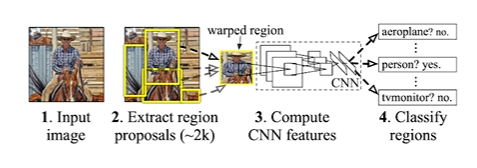

---
## SPPNet
- R-CNN이 너무 느려서 개선시킴.
- 이미지 안에서 CNN을 한번만 돌리자 아이디어로 시작함.
- 이미지 안에서 Bounding Box를 뽑고, 이미지 전체에 대해서 Convolution Feature Map을 만듦.
- 뽑힌 Bounding Box 위치에 해당하는 Convolution Feature Map의 Tensor만 가져옴.


- Convolution을 한번만 돌리지만, 결국 Bounding Box에 해당하는 Tensor를 여러개 가져와서 spatial pyramid pooling로 하나의 벡터를 만들고 그걸 분류하기 때문에 느리긴 마찬가지다.

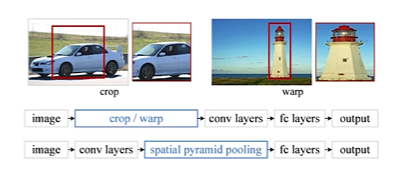

---
## Fast R-CNN
- SPPNet과 마찬가지 컨셉
- Selective Search로 Bounding box를 미리 2000개 뽑음 (region)
- 그리고 Conv feature map을 한번 얻음
- 각각의 region에 대해서 fixed length feature를 뽑는다. (ROI pooling을 통해 뽑는다)
- 마지막에 뉴럴 네트워크를 통해서 Bounding Box에 대한 라벨을 찾는다.

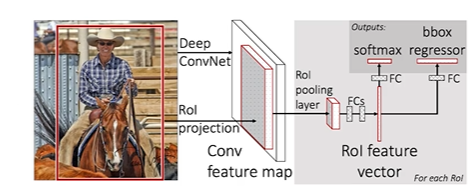

---
## Faster R-CNN
- Bounding Box를 뽑아내는 Region Proposal 조차도 학습을 통해 뽑자로 바뀜. (RPN)
- Fast R-CNN에 RPN을 더한 것임

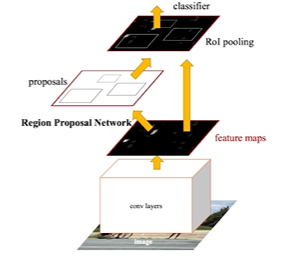

### Region Proposal Network
- 이미지에서 특정 영역이 Bounding Box로써의 의미가 있는지(물체가 있는지)를 찾아줌.
- Anchor Boxes: 미리 정해놓은 bbox의 크기 (템플릿이라고 생각하면 됨)


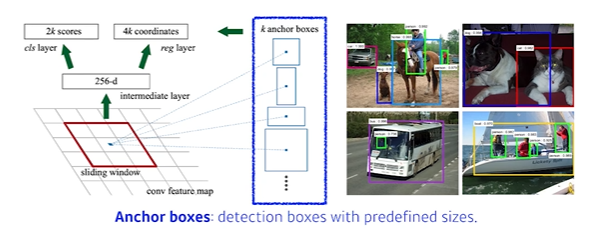

- Anchor Boxes(predefined region sizes)가 9개가 있음. 이 중에서 하나를 고르게 됨
- 각각의 region size마다 bbox를 얼마나 키우고 줄일지 (W,H,X,Y) 4개의 파라미터 필요
- 해당 bbox가 쓸모잇는지 없는지 2개의 파라미터 필요

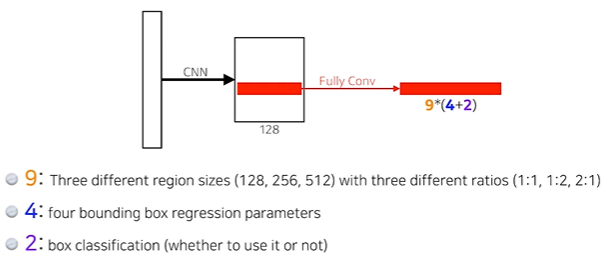

---
## YOLO (v1)
- 현재 v5까지 나왔음.
- 속도가 매우 빠름
- 이미지 한장에서 바로 아웃풋이 나오도록 함.
- Faster R-CNN에서는 bbox를 찾는 RPN이 있고 거기서 나오는 bbox를 따로 분류했지만, YOLO는 한번에 분류할 수 있다.

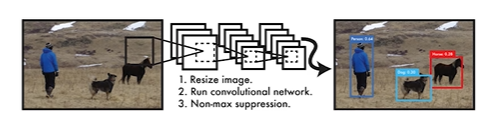

- 이미지를 S*S 그리드로 나눈다.
- 찾고 싶은 물체의 중앙이 어떤 그리드 안에 들어가면, 그 그리드 셀이 해당 물체의 bbox와 해당 물체가 무엇인지를 같이 예측을 한다.
    - 각 셀은 B개의 bbox를 예측한다. ((X,Y,W,H)와 박스가 쓸모 있는지)
    - 동시에 각 셀은 그 물체가 어떤 class인지도 예측한다.
- 2개의 정보를 취합하면, bbox와 bbox가 어떤 class인지 나온다.
- S*S*(B*5 + C)개의 Tensor를 만들면 된다.

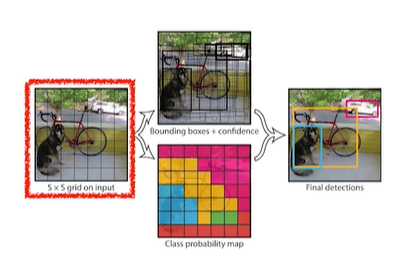